In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning and Exploratory Data Analysis
We will remove the unnecessary columns and map the 'diagnosis' column to binary values (Malignant as 1, Benign as 0) for easier processing. We'll also generate some visualizations to better understand the data. The correlation heatmap shows the pairwise correlation of all columns in the dataframe. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

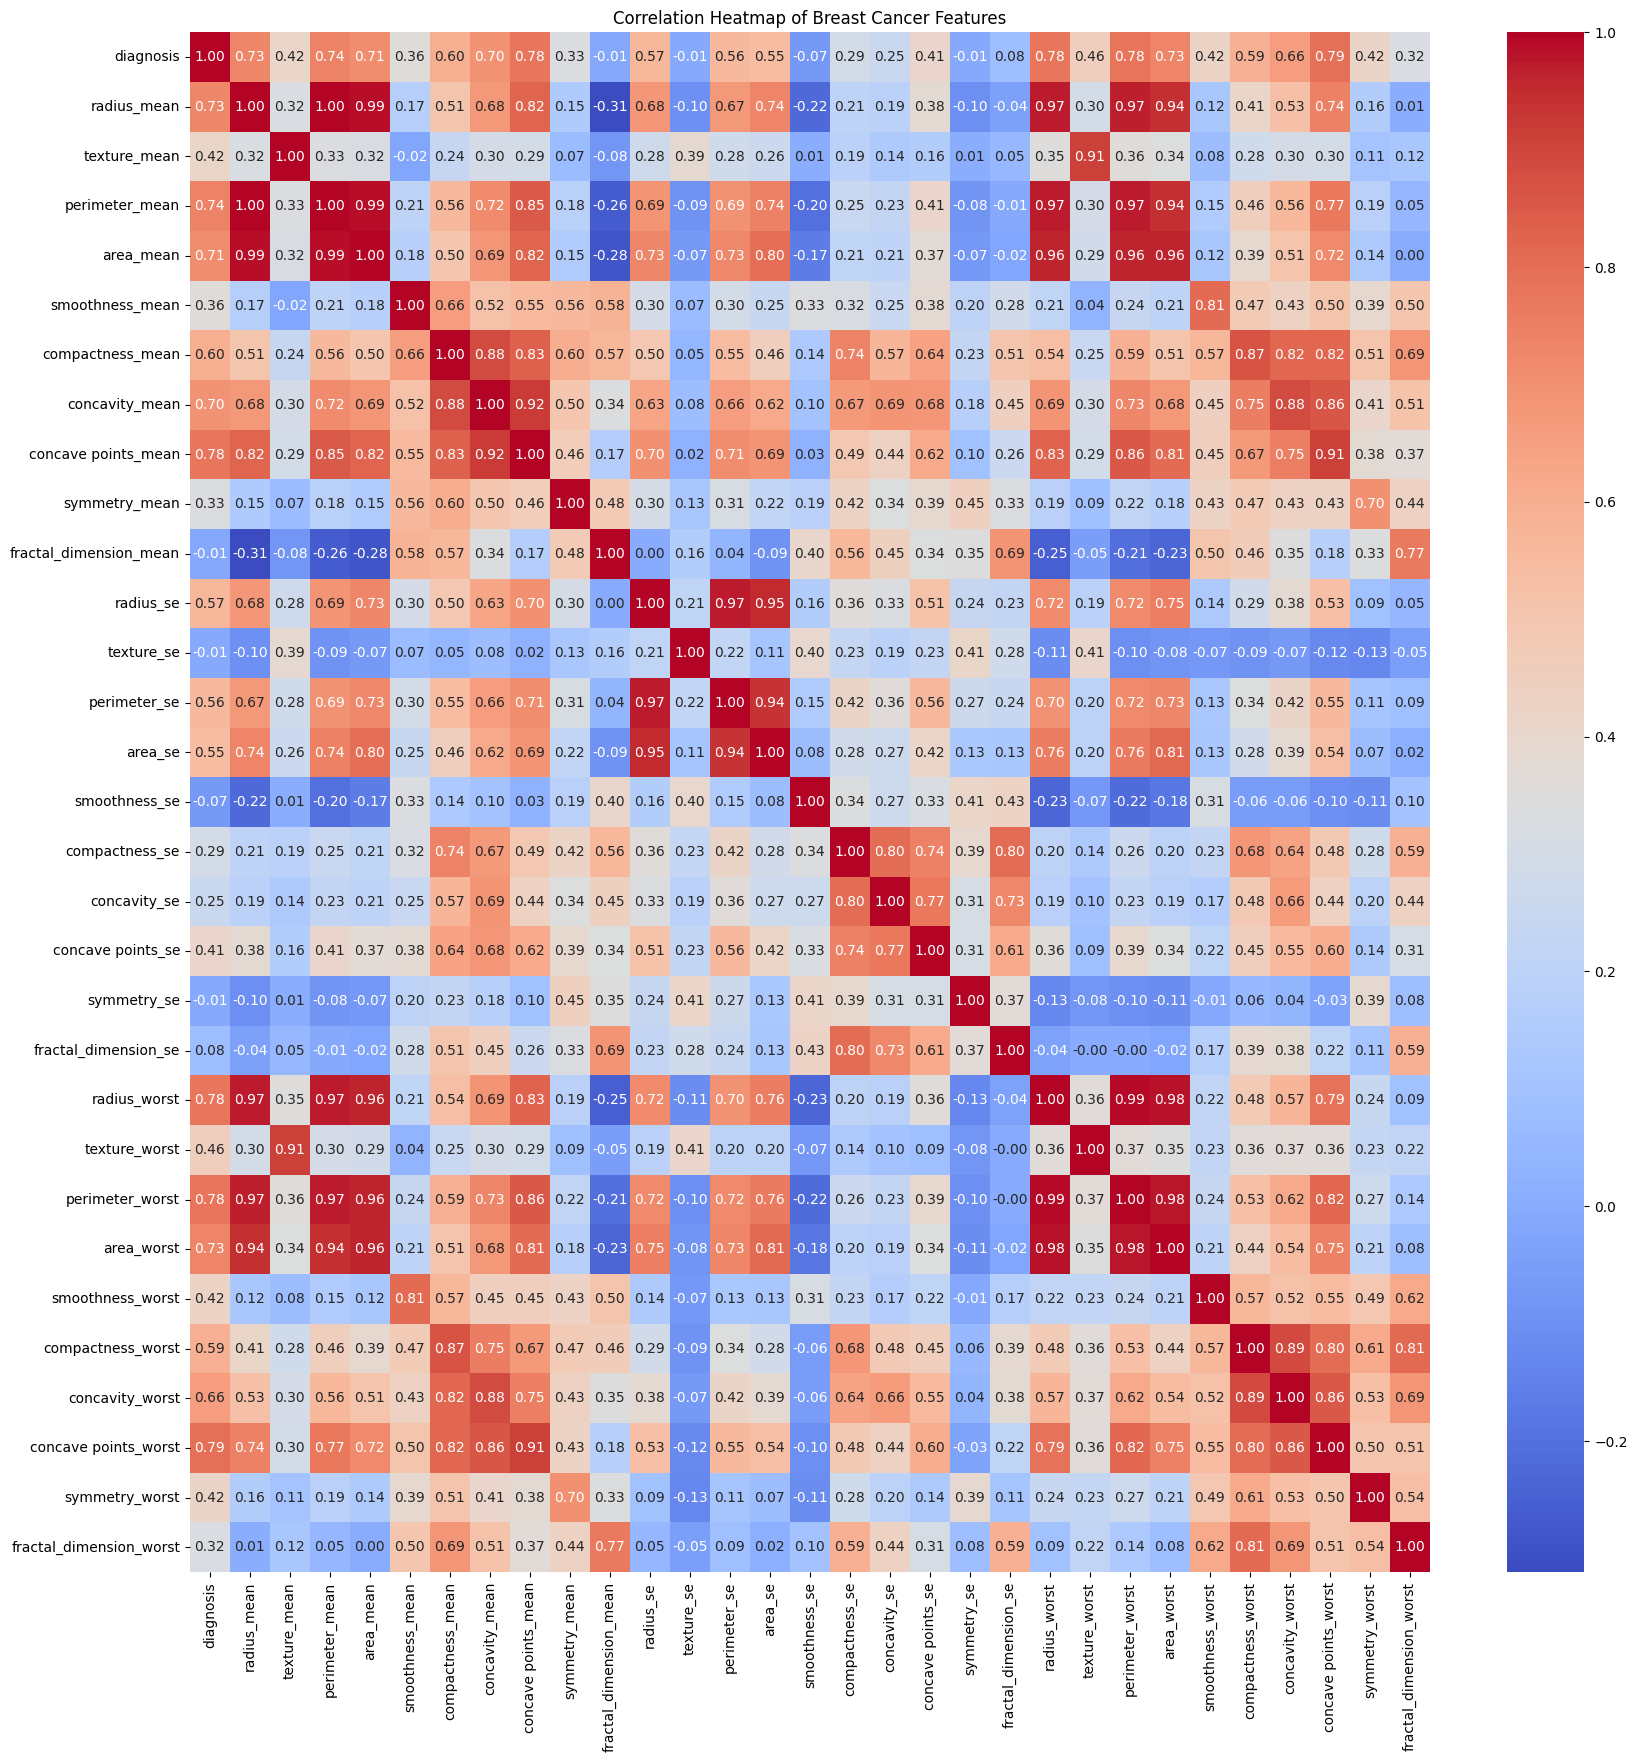

In [2]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Map the 'diagnosis' column to binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Generate a correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()


From the heatmap, we can see that many features are strongly correlated with each other. For example, radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, etc. have a high correlation with the diagnosis (either positive or negative).

For a better understanding of the data, let's create histograms of some of the features. We can select some of the features that have a high correlation with the diagnosis as observed from the heatmap. This will help us understand the distribution of the data for each class (Malignant - 1 and Benign - 0).

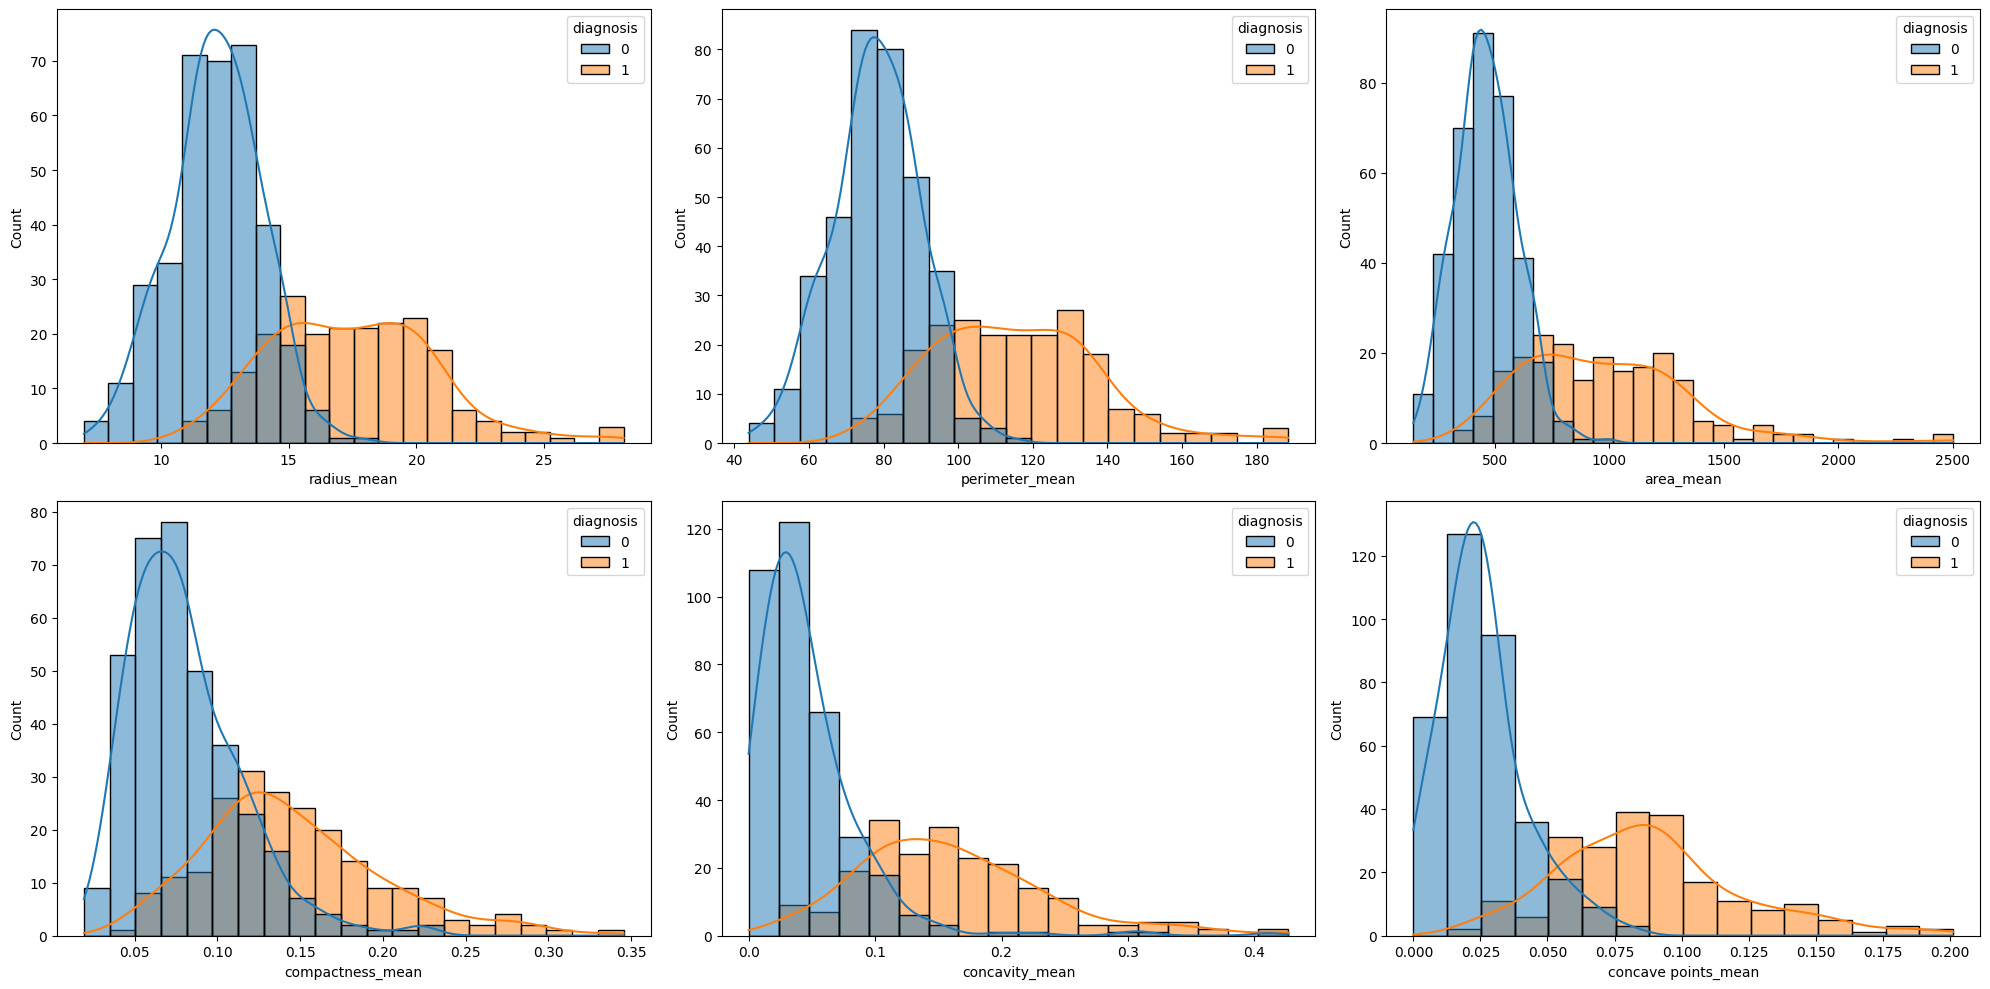

In [3]:
# Select features that have high correlation with diagnosis
selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 
                     'compactness_mean', 'concavity_mean', 'concave points_mean']

# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for ax, feature in zip(axes.flatten(), selected_features):
    sns.histplot(data=df, x=feature, hue="diagnosis", kde=True, ax=ax)

plt.tight_layout()
plt.show()

## Implementing Different Models and Analyzing their Performance

For each of the models, we can plot a confusion matrix, which is a table layout that allows visualization of the performance of an algorithm. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

Model: Random Forest
Precision: 0.97
Recall: 0.85
Accuracy: 0.93


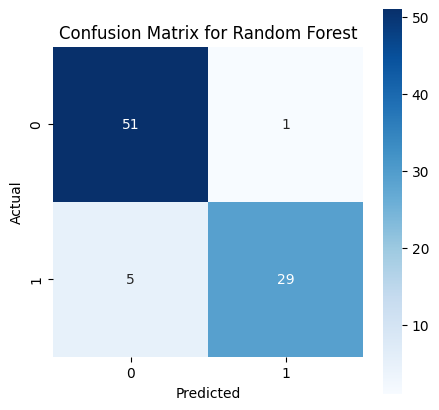

Model: K-Nearest Neighbors
Precision: 0.96
Recall: 0.76
Accuracy: 0.90


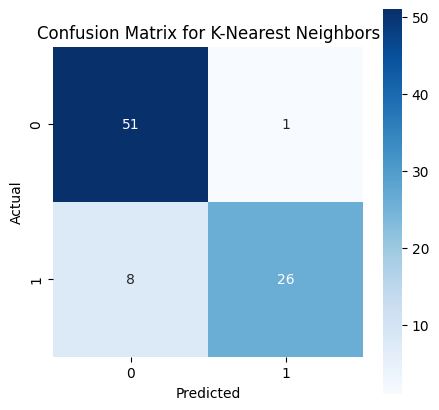

Model: Support Vector Machine
Precision: 1.00
Recall: 0.74
Accuracy: 0.90


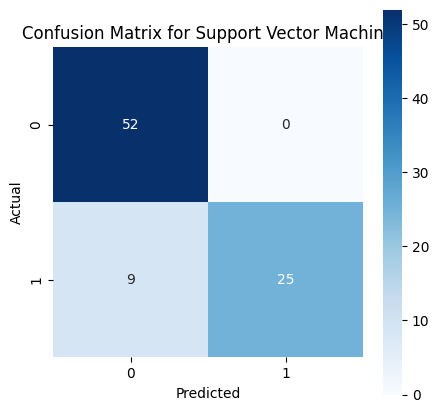

Model: MLP
Precision: 0.94
Recall: 0.85
Accuracy: 0.92


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


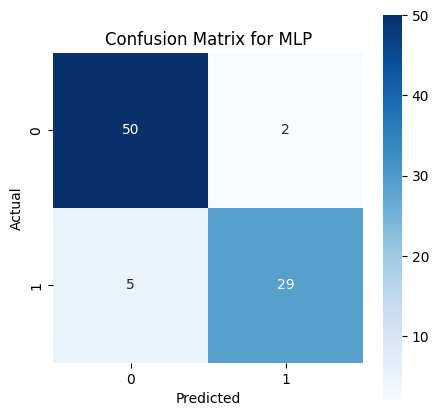

In [5]:
# Define prediction variables
prediction_vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
                   'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 
                   'radius_worst', 'perimeter_worst', 'compactness_worst']

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.15, random_state=1)
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

# Define the models
models = {'Random Forest': RandomForestClassifier(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Support Vector Machine': SVC(),
          'MLP': MLPClassifier()}

# Fit the models, make predictions, and calculate metrics
for name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    accuracy = accuracy_score(test_y, predictions)
    
    print(f"Model: {name}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    
    # Plot the confusion matrix
    cm = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", square=True, cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


### Quick Analysis

The Support Vector Machine model has a precision of 1.00, indicating that it has no false positive errors. However, it has a lower recall (0.74) than the Random Forest model, meaning it has more false negative errors.

The Random Forest model has a precision of 0.97 and recall of 0.85, both of which are relatively high, making it a strong model overall.

The K-Nearest Neighbors and MLP models also perform well but have slightly lower recall values.


### Feature Importance using the Strongest Model -- Random Forest

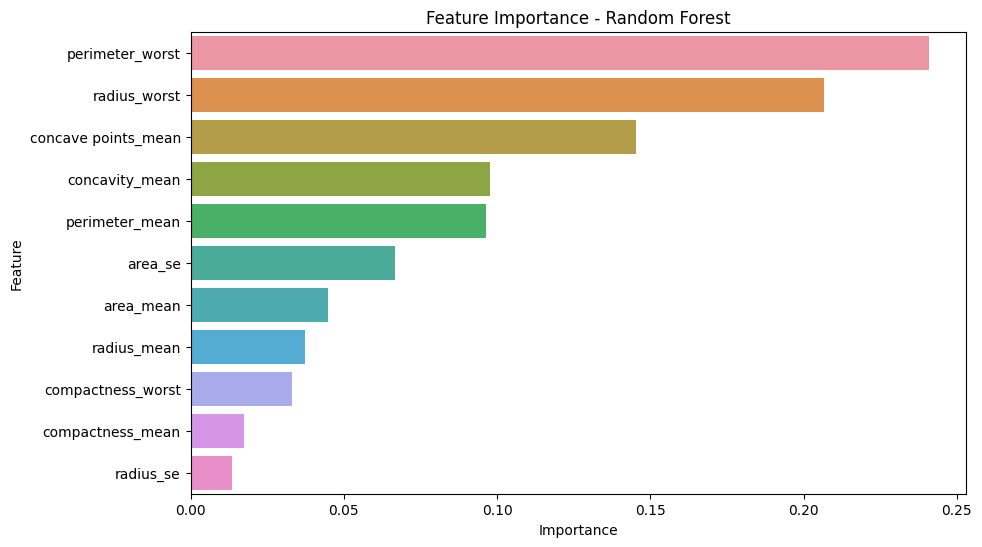

In [6]:
# Extract feature importances from the Random Forest model
importances = models['Random Forest'].feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({"Feature": prediction_vars, "Importance": importances})

# Sort by importance
feature_importances = feature_importances.sort_values("Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Implementing a Random Forest Algorithm from scratch

Just a simple implementation of a Decision Tree. To create a random forest, creation of multiple decision trees and combining their results is necessary. This is a very basic implementation of a decision tree and lacks many features of the decision trees in Scikit-learn, such as handling categorical variables, missing values, and different impurity measures.

Model: Custom Decision Tree
Precision: 0.90
Recall: 0.82
Accuracy: 0.90


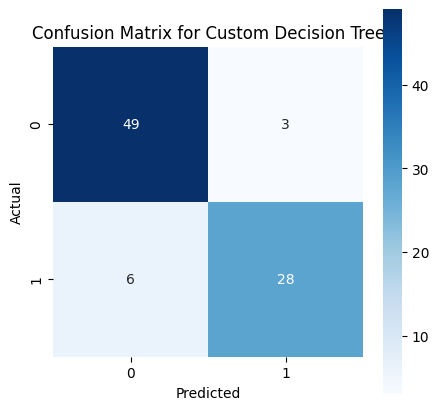

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


# Load the data
df = pd.read_csv('data.csv')

# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Map the 'diagnosis' column to binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define prediction variables
prediction_vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
                   'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 
                   'radius_worst', 'perimeter_worst', 'compactness_worst']

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.15, random_state=1)
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

# Convert diagnosis to numpy array for compatibility with our custom model
train_y_np = train_y.to_numpy()
test_y_np = test_y.to_numpy()

# Create and train the model
model = DecisionTree(max_depth=10)
model.fit(train_x.to_numpy(), train_y_np)

# Make predictions on the test set
predictions = model.predict(test_x.to_numpy())

# Calculate metrics
precision = precision_score(test_y_np, predictions)
recall = recall_score(test_y_np, predictions)
accuracy = accuracy_score(test_y_np, predictions)

print(f"Model: Custom Decision Tree")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(test_y_np, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Custom Decision Tree')
plt.show()

## Implementing a Support Vector Machine Algorithm from scratch

Model: Custom Linear SVM
Precision: 1.00
Recall: 0.50
Accuracy: 0.80


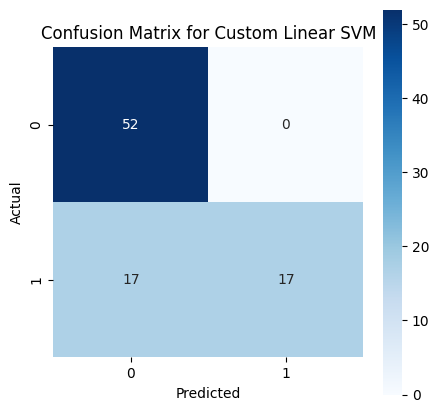

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.where(np.sign(approx) <= 0, 0, 1)

# Load the data
df = pd.read_csv('data.csv')

# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Map the 'diagnosis' column to binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define prediction variables
prediction_vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
                   'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 
                   'radius_worst', 'perimeter_worst', 'compactness_worst']

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.15, random_state=1)
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

# Convert diagnosis to numpy array for compatibility with our custom model
train_y_np = train_y.to_numpy()
test_y_np = test_y.to_numpy()

# Create and train the model
model = LinearSVM()
model.fit(train_x.to_numpy(), train_y_np)

# Make predictions on the test set
predictions = model.predict(test_x.to_numpy())

# Calculate metrics
precision = precision_score(test_y_np, predictions)
recall = recall_score(test_y_np, predictions)
accuracy = accuracy_score(test_y_np, predictions)

print(f"Model: Custom Linear SVM")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(test_y_np, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Custom Linear SVM')
plt.show()